<div class="alert alert-block alert-info">

### Understand data's readiness for ML and Prepare it for ML

#### 0. Read the CSV data file
#### 1. Data Distribution
#### 2. Correlation Analysis    
#### 3. Frequency Distribution (Categorical features)
#### 4. Frequency Distribution (Numerical features)
#### 5. Data prep for XGBoost
#### 6. Split the data into training, validation and testing
#### 7. Upload the data files to S3


<b>How will we do it?</b>
- Use Pandas for reading the data
- Use Matplotlib for visualization
    </div>

<div class="alert alert-block alert-success">
    
### 0. Read the Data file </div>

In [13]:
# Import the appropriate packages
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
churn = pd.read_csv("./churn-dataset-with-header.csv")

# To checkout the data - uncomment the line below
# churn

<div class="alert alert-block alert-success">
    
# 1. Data Analysis | Distribution
    
* Look for features that you think will NOT play any role in the churn prediction. Those features will be dropped. Some such features may be obvious *but* for some you may need assistance from the business SME.
* Certain features that have a numeric representation but have no order can mislead the ML algorithms and that mess up the accuracy. Look for such fields. Such fields may be either dropped if they are not relevant or the type of such fields need to be changed to non-numeric.
* Even distribution is desired to minimize the bias *but* it may not be the case all the time. There are many techniques to address this issue. 
</div>

Churn Distribution  - True frequency=14.49%


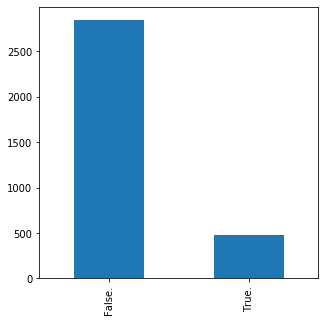

State Distribution


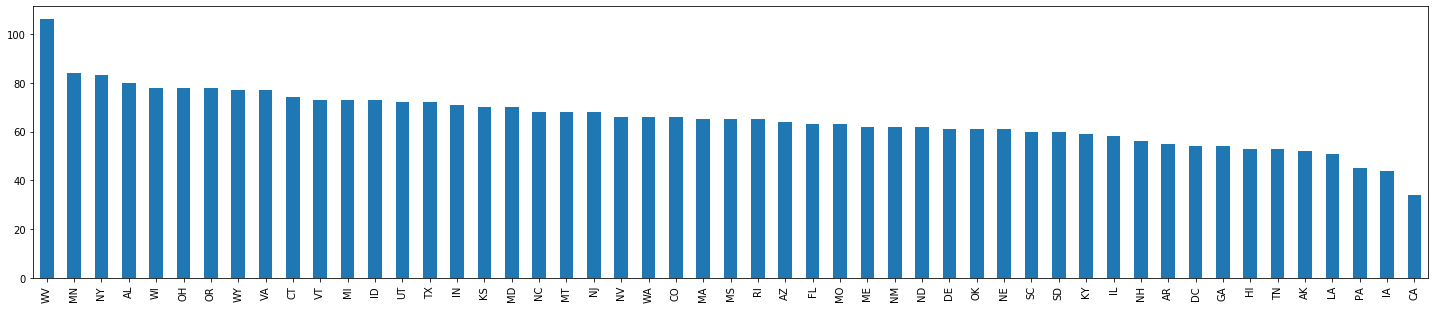

Numeric Fields Distribution


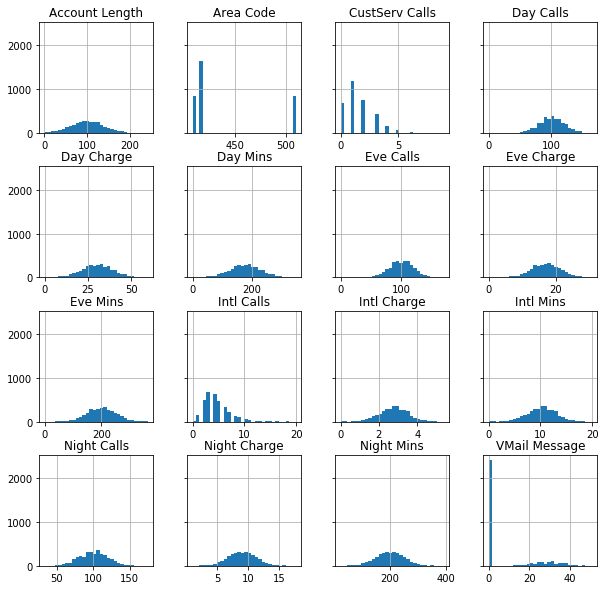

In [14]:
# Get the stats for the fields - uncomment the line below to checkout the data
# display(churn.describe())

%matplotlib inline

ct = round((churn[churn["Churn?"]=="True."].count()["Churn?"] * 100)/churn["Churn?"].count(),2)
print("Churn Distribution  - True frequency={}%".format(ct))
churn['Churn?'].value_counts().plot(kind='bar',figsize=(5,5))
plt.show()

# State Distribution
print("State Distribution")
churn['State'].value_counts().plot(kind='bar',figsize=(25,5))
plt.show()

# Histograms for each numeric features
true_count=churn["Churn?"]


print("Numeric Fields Distribution")
hist = churn.hist(bins=30, sharey=True, figsize=(10, 10))

## Uncomment below to see the data - Frequency tables for each categorical feature
# for column in churn.select_dtypes(include=['object']).columns:
#     display(pd.crosstab(index=churn[column], columns='% observations', normalize='columns'))

<div class="alert alert-info"> 

### Results of Distribution Analysis
1. State appears to be quite evenly distributed; skewness can be problematic as it can lead to higher bias

2. Only 14% of customers churned, so there is some class imabalance, but *nothing extreme*; Imabalanced data sets lead to BAD predictions but we are fine as imbalance is NOT extreme.

3. Phone takes on too many unique values to be of any practical use. 

4. Area Code showing up as a numeric feature we should

<strong>ðŸ’¡ DROP the 'Phone' feature as it doesn't play a role in customer's decision</strong>
    
<strong>ðŸ’¡ Change the 'Area Code' field type to non-numeric </strong></div>


In [15]:
# DROP the Phone
churn = churn.drop('Phone', axis=1)

# CHANGE the type of 'Area Code'
churn['Area Code'] = churn['Area Code'].astype(object)

<div class="alert alert-block alert-success">

# 2. Correlation | Relationship analysis
That is, we are going to check which features have an impact on whether the customer is at the risk of churn or not.
- Pandas Cross tabs are a quick way to checkout the correlation between the field and the label
- To read checkout the churn True-frequency against the value of the attribute

We need to lookout for the features that have 100% correlation. It can easily be done by plotting scatter matrix. Please be patient as these graphs take time to plot. For larger data sets it may not be even feasible.
    
</div>

Account Length  VMail Message  Day Mins  Day Calls  \
Account Length        1.000000      -0.004628  0.006216   0.038470   
VMail Message        -0.004628       1.000000  0.000778  -0.009548   
Day Mins              0.006216       0.000778  1.000000   0.006750   
Day Calls             0.038470      -0.009548  0.006750   1.000000   
Day Charge            0.006214       0.000776  1.000000   0.006753   
Eve Mins             -0.006757       0.017562  0.007043  -0.021451   
Eve Calls             0.019260      -0.005864  0.015769   0.006462   
Eve Charge           -0.006745       0.017578  0.007029  -0.021449   
Night Mins           -0.008955       0.007681  0.004323   0.022938   
Night Calls          -0.013176       0.007123  0.022972  -0.019557   
Night Charge         -0.008960       0.007663  0.004300   0.022927   
Intl Mins             0.009514       0.002856 -0.010155   0.021565   
Intl Calls            0.020661       0.013957  0.008033   0.004574   
Intl Charge           0.009546       0.002884 -0.010092   0.021666   
CustServ Calls       -0.003796      -0.013263 -0.013423  -0.018942   

                Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
Account Length    0.006214 -0.006757   0.019260   -0.006745   -0.008955   
VMail Message     0.000776  0.017562  -0.005864    0.017578    0.007681   
Day Mins          1.000000  0.007043   0.015769    0.007029    0.004323   
Day Calls         0.006753 -0.021451   0.006462   -0.021449    0.022938   
Day Charge        1.000000  0.007050   0.015769    0.007036    0.004324   
Eve Mins          0.007050  1.000000  -0.011430    1.000000   -0.012584   
Eve Calls         0.015769 -0.011430   1.000000   -0.011423   -0.002093   
Eve Charge        0.007036  1.000000  -0.011423    1.000000   -0.012592   
Night Mins        0.004324 -0.012584  -0.002093   -0.012592    1.000000   
Night Calls       0.022972  0.007586   0.007710    0.007596    0.011204   
Night Charge      0.004301 -0.012593  -0.002056   -0.012601    0.999999   
Intl Mins        -0.010157 -0.011035   0.008703   -0.011043   -0.015207   
Intl Calls        0.008032  0.002541   0.017434    0.002541   -0.012353   
Intl Charge      -0.010094 -0.011067   0.008674   -0.011074   -0.015180   
CustServ Calls   -0.013427 -0.012985   0.002423   -0.012987   -0.009288   

                Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
Account Length    -0.013176     -0.008960   0.009514    0.020661     0.009546   
VMail Message      0.007123      0.007663   0.002856    0.013957     0.002884   
Day Mins           0.022972      0.004300  -0.010155    0.008033    -0.010092   
Day Calls         -0.019557      0.022927   0.021565    0.004574     0.021666   
Day Charge         0.022972      0.004301  -0.010157    0.008032    -0.010094   
Eve Mins           0.007586     -0.012593  -0.011035    0.002541    -0.011067   
Eve Calls          0.007710     -0.002056   0.008703    0.017434     0.008674   
Eve Charge         0.007596     -0.012601  -0.011043    0.002541    -0.011074   
Night Mins         0.011204      0.999999  -0.015207   -0.012353    -0.015180   
Night Calls        1.000000      0.011188  -0.013605    0.000305    -0.013630   
Night Charge       0.011188      1.000000  -0.015214   -0.012329    -0.015186   
Intl Mins         -0.013605     -0.015214   1.000000    0.032304     0.999993   
Intl Calls         0.000305     -0.012329   0.032304    1.000000     0.032372   
Intl Charge       -0.013630     -0.015186   0.999993    0.032372     1.000000   
CustServ Calls    -0.012802     -0.009277  -0.009640   -0.017561    -0.009675   

                CustServ Calls  
Account Length       -0.003796  
VMail Message        -0.013263  
Day Mins             -0.013423  
Day Calls            -0.018942  
Day Charge           -0.013427  
Eve Mins             -0.012985  
Eve Calls             0.002423  
Eve Charge           -0.012987  
Night Mins           -0.009288  
Night Calls          -0.012802  
Night Charge         -0.009277  
I

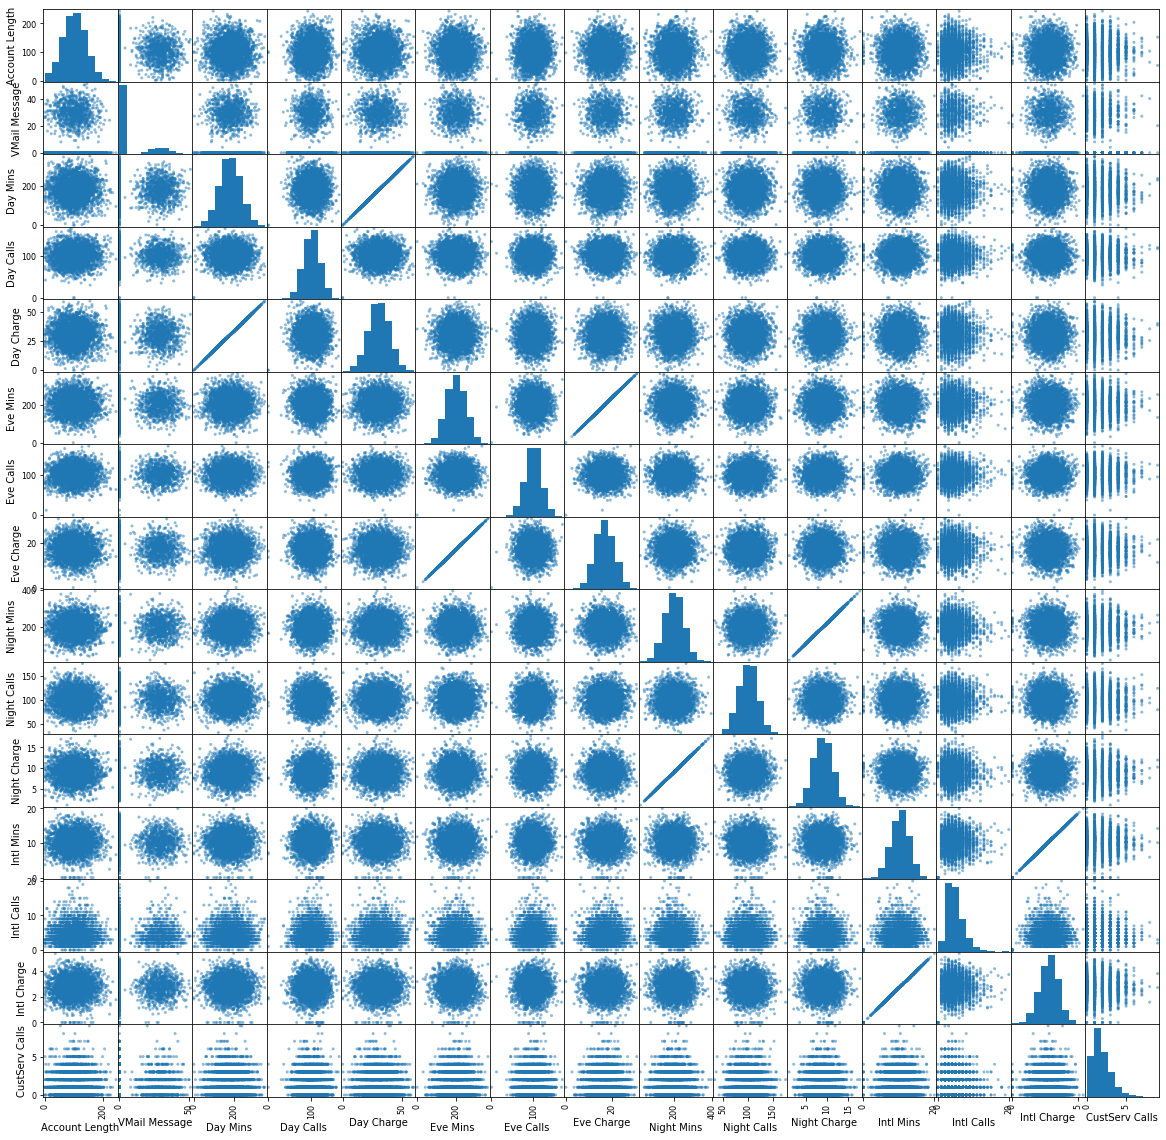

In [16]:
# Display and plot the correlation between fields
display(churn.corr())
pd.plotting.scatter_matrix(churn, figsize=(20, 20))
plt.show()

<div class="alert alert-info"> 
    
### Result of correlation analysis
Following features have 100% correlation with some of the other fields
* Day Charge   -    Day Min
* Eve Charge   -    Eve Min
* Night Charge -    Night Min
* Intl Charge  -    Intl Min

ðŸ’¡ <strong>DROP the fields 'Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'</strong></div>

In [17]:
## DROP the fields 'Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'
churn = churn.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], axis=1)

<div class="alert alert-success">
    
# 3. Frequency Analysis (Categorical Features)
Plot the counts of Churn?=True | Churn?=False and try to understand the relationship.
</div>

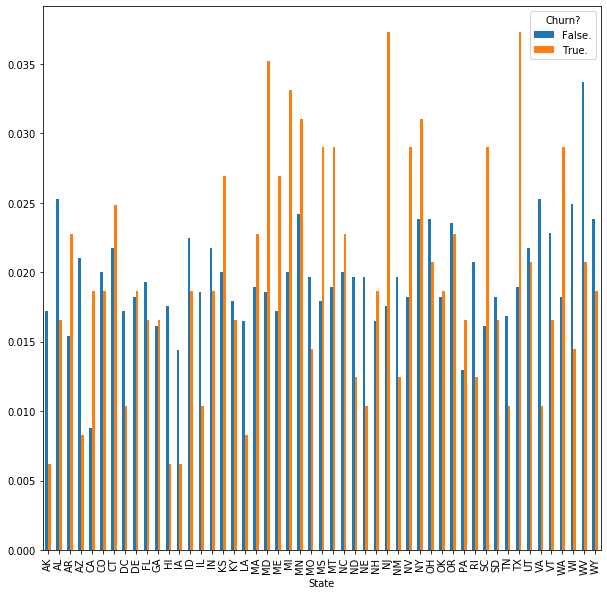

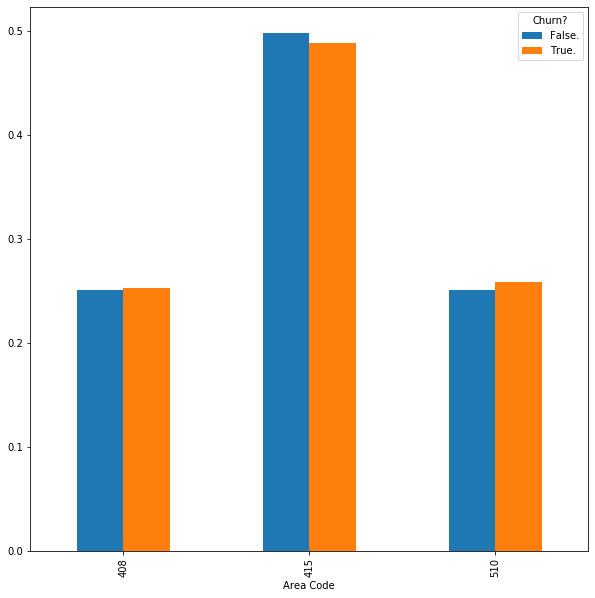

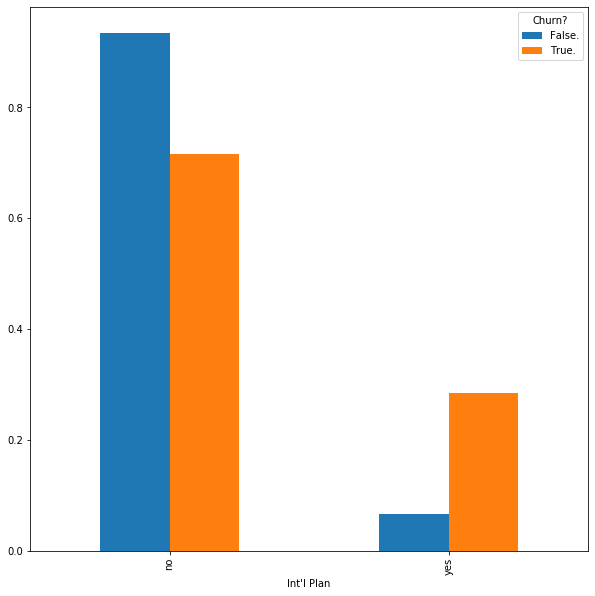

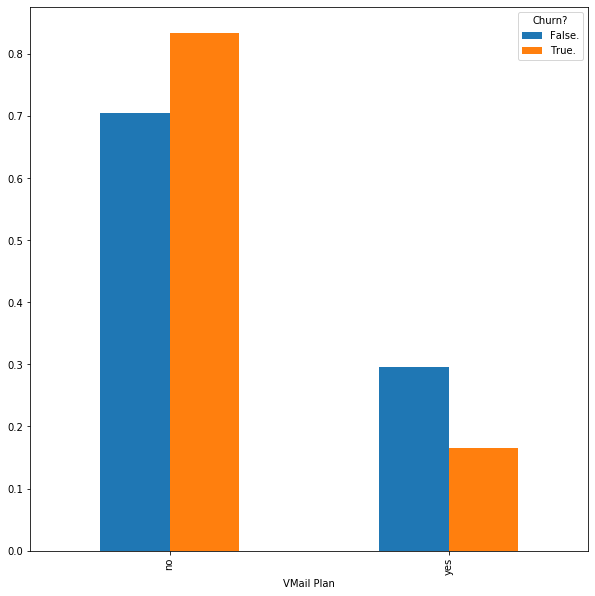

In [18]:
# Frequency Analysis 
for column in churn.select_dtypes(include=['object']).columns:
    if column != 'Churn?':
#         display(pd.crosstab(index=churn[column], columns=churn['Churn?'], normalize='columns'))
        pd.crosstab(index=churn[column], columns=churn['Churn?'], normalize='columns').plot(kind='bar',figsize=(10,10))
        plt.show()

<div class="alert alert-info">

### Results of Frequency Analysis (Categorical Features)

<strong>ðŸ’¡ Churners are fairly evenly distributed geographically</strong>
    
<strong>ðŸ’¡ Churners are MORE likely to have an international plan</strong>
    
<strong>ðŸ’¡ Churners LESS likely to have a voicemail plan</strong></div>

<div class="alert alert-success">
    
# 4. Frequency Analysis (Numerical Features)
Plot the counts of Churn?=True | Churn?=False and try to understand the relationship.
</div>

Account Length


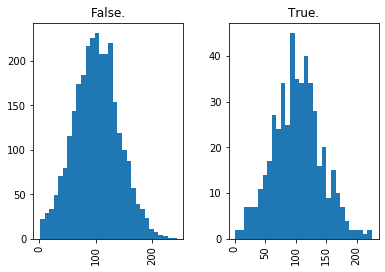

VMail Message


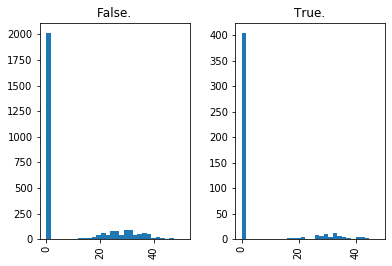

Day Mins


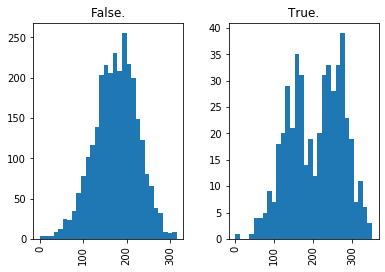

Day Calls


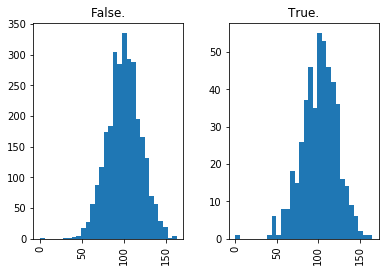

Eve Mins


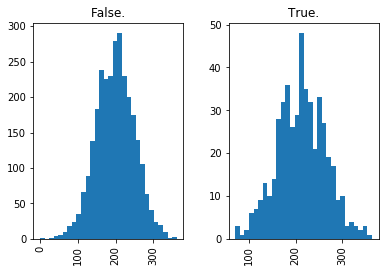

Eve Calls


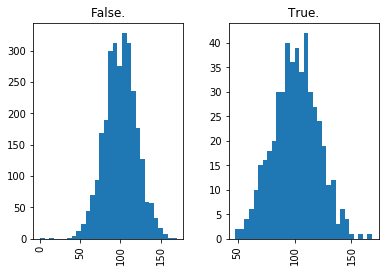

Night Mins


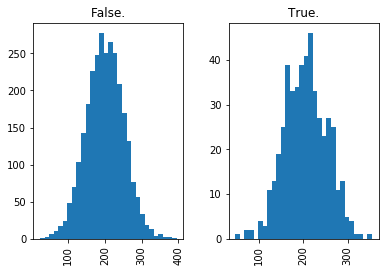

Night Calls


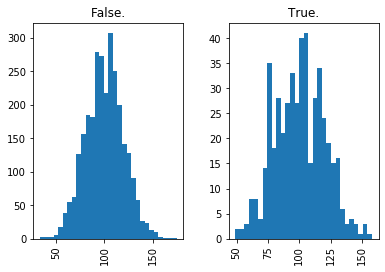

Intl Mins


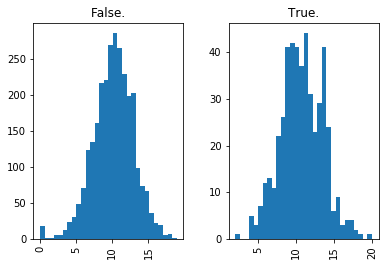

Intl Calls


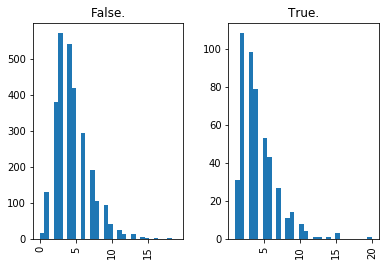

CustServ Calls


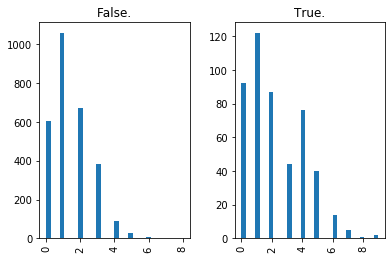

In [19]:
## Uncomment the following two lines to checkout the data
#     if column != 'Churn?':
#         display(pd.crosstab(index=churn[column], columns=churn['Churn?'], normalize='columns'))
for column in churn.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = churn[[column, 'Churn?']].hist(by='Churn?', bins=30)
    plt.show()

<div class="alert alert-info"> 
    
### Results of Frequency Analysis (Numerical Features)

<strong>ðŸ’¡ Churners have a larger number of customer service calls (which makes sense as we'd expect customers who experience lots of problems may be more likely to churn)</strong>
    
<strong>ðŸ’¡ Churners exhibit some bimodality in daily minutes (either higher or lower than the average for non-churners)</strong></div>

<div class="alert alert-success"> 
    
# 5. Preparing the data for ML Algo (XGBoost)
At this time our data is Clean *BUT* it is not yet ready to be consumed by ML algorithms. Each algo requires the data in certain format. We will be using XGBoost so we need to ensure the following:

* Data is in either CSV or LibSVM format
* The categorical columns need to be "One Hot Encoded" i.e., numerical representation 
* The prediction column or Label MUST be in the first column
* The HEADER shouldn't be there

</div>

In [20]:
# OHE - Categorical var42614261aws batch
model_data = pd.get_dummies(churn)

# Add the 'Churn?' column to the begining 
model_data = pd.concat([model_data['Churn?_True.'], model_data.drop(['Churn?_False.', 'Churn?_True.'], axis=1)], axis=1)


# train_data, validation_data, test_data = np.split(model_data.sample(frac=1, random_state=1729), [int(0.7 * len(model_data)), int(0.9 * len(model_data))])
# train_data.to_csv('train.csv', header=False, index=False)
# validation_data.to_csv('validation.csv', header=False, index=False)

<div class="alert alert-success"> 
    
### 6. Split the data into training, validation and testing

* training     90%      train.csv
* validation   10%      validation.csv
* testing      10%      test.csvc
</div>

In [25]:
import numpy as np

train_data, validation_data, test_data = np.split(model_data.sample(frac=1, random_state=1729), [int(0.7 * len(model_data)), int(0.9 * len(model_data))])
train_data.to_csv('train.csv', header=False, index=False)
validation_data.to_csv('validation.csv', header=False, index=False)
test_data.to_csv('test.csv', header=False, index=False)

# Used for local model evaluation in a later exercise - ignore at this time
test_data.to_csv('test_header.csv', header=True, index=False)

<div class="alert alert-success"> 
    
#### 7. Upload the data files to S3
    
The Machine Learning Training Jobs reads the data from S3 buckets and writes the models to the S3 Buckets. Before executing the next step. <code style="background:yellow;color:black">You MUST create an S3 Bucket</code>

You may create the bucket in many ways:

- Use the AWS Console
- Use the AWS CLI
- Use the Boto3/SDK

In this step we need to create the S3 bucket that we will use through the rest of this exercise. Decide on the name of the bucket you will create. My suggestion - name your bucket using the scheme below:

*[First Name]*-[Last-4-Digit-of-Your-Phone-Number]

S3 bucket name MUST be unique across AWS so if you run into name collision then adjust the name e.g., by adding a '-1' at end or using your house number instead of phone number ... be creative but make the name easy to remember :)
    
</div>

In [22]:
# Create an S3 bucket using the console

bucket = "awsrajeev"

# This will be a folder created under your bucket 
prefix = "sagemaker/churn-analysis"


In [23]:
import boto3
import os

boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, "train/train.csv")).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, "validation/validation.csv")).upload_file('validation.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, "test/test.csv")).upload_file('test.csv')

boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'raw/churn-dataset-with-header.csv')).upload_file('churn-dataset-with-header.csv')

<div class="alert alert-danger"> 

### IMPORTANT
If you made changes to the notebook or if there are errors. 

* Un comment the code in the next block 
* Run the cell; this will pick up the files from under the data-files folder and upload to the S3

</div>

In [24]:
## IGNORE this cell
## IF (A) you did not change the code in this notebook (B) you were able to execute the notebook without any errors

# boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, "train/train.csv")).upload_file('data-files/train.csv')
# boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, "validation/validation.csv")).upload_file('data-files/validation.csv')
# boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, "test/test.csv")).upload_file('data-files/test.csv')

# boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'raw/churn-dataset-with-header.csv')).upload_file('churn-dataset-with-header.csv')